In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dat = np.arange(0.0, 1.0, 0.0001)
num_bits = 3.0

## Linear: quantizing the given range linearly

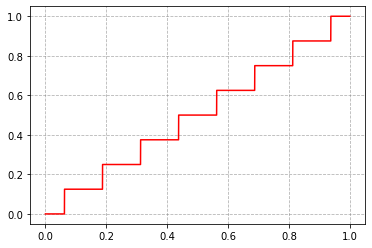

In [5]:
def linearQuant(data, bits, range=(0.0, 1.0)):
    base = (range[1] - range[0]) / 2.0**bits
    return np.floor(data / base + 0.5) * base

linear_quant_dat = linearQuant(dat, num_bits)
plt.plot(dat, linear_quant_dat, 'r-')
plt.grid(linestyle='--', color='grey', alpha=0.6)
plt.show()

## Log: quantizing on log base, the num_bits affects the minimum value

<Figure size 432x288 with 0 Axes>

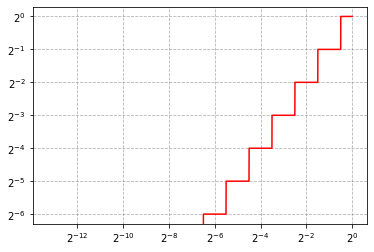

In [14]:
def logQuant(att, bits):
    exp = np.floor(np.log2(att) + 0.5)
    min_exp = -(2.0**bits-1)
    clamped_exp = np.copy(exp)
    clamped_exp[exp <= min_exp] = float("-inf")
    return np.power(2.0, clamped_exp)

log_quant_dat = logQuant(dat, num_bits)
plt.clf()
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.plot(dat, log_quant_dat, 'r-')
ax.grid(linestyle='--', color='grey', alpha=0.6)
plt.show()

## Clamped log base: quantizing only the selecting range evenly on log base.

<Figure size 432x288 with 0 Axes>

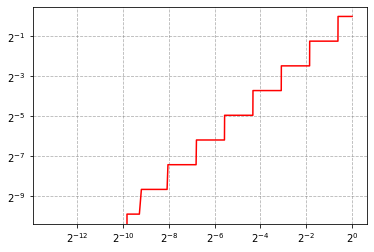

In [15]:
def clampedLogQuant(att, bits):
    min_exp = -9.9
    step = min_exp / 2.0**bits
    exp = np.log2(att)
    clamped_exp = np.floor(exp / step + 0.5) * step
    clamped_exp[exp < min_exp] = float("-Inf")
    return np.power(2.0, clamped_exp)

clamped_log_quant_dat = clampedLogQuant(dat, num_bits)
plt.clf()
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.plot(dat, clamped_log_quant_dat, 'r-')
ax.grid(linestyle='--', color='grey', alpha=0.6)
plt.show()

## Binarization

<Figure size 432x288 with 0 Axes>

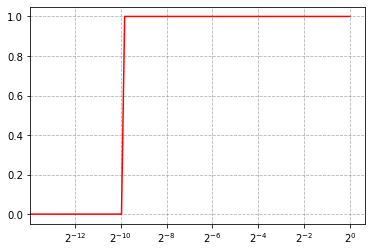

In [18]:
 def binQuant(att, bits):
     thres = 1e-3
     res_att = att.copy()
     res_att[att <= thres] = 0.0
     res_att[att > thres] = 1.0

     return res_att

bin_quant_dat = binQuant(dat, num_bits)
plt.clf()
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.plot(dat, bin_quant_dat, 'r-')
ax.grid(linestyle='--', color='grey', alpha=0.6)
plt.show()

## Ranking on the distribution:

In [ ]:

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)